In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

## Решение

1.

а) - временной ряд.

б) - нет

в) - нет

г) - нет

д) - нет

е) - если координаты во времени, то да

2.

In [3]:
filename = 'DUQ_hourly.csv'

In [4]:
data = pd.read_csv(filename, index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


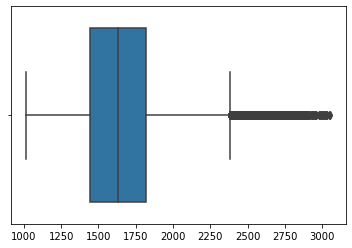

In [7]:

sns.boxplot(data.values)
plt.show()

In [8]:
data['DUQ_MW'].isnull().sum()

0

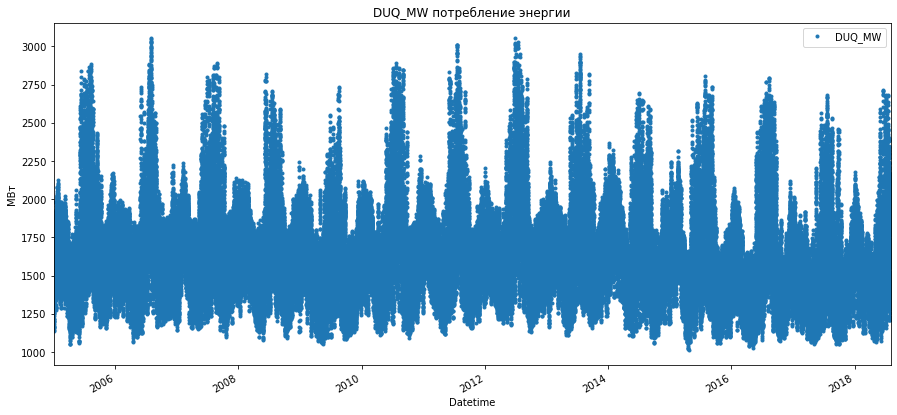

In [9]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [16]:
data['date'] = data.index
data['date'].unique().shape

(119064,)

In [18]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Пропусков нет, но есть четыре наблюдения с одинаковым значением времени.

3.

In [19]:
filename = 'нефть-brent 2010-2019.xlsx'
brent_data = pd.read_excel(filename, index_col=[0], parse_dates=[0])
brent_data = brent_data.sort_index()
brent_data.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [20]:
brent_weekly_mean = brent_data.resample('W').mean()
brent_weekly_mean.loc[brent_weekly_mean['Значение'].isnull(), :]

,Значение
Дата,
2011-10-16,NaN


In [21]:
brent_monthly_mean = brent_data.resample('M').mean()
brent_monthly_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4.

In [22]:
brent_weekly_std = brent_data.resample('W').std()
brent_monthly_std = brent_data.resample('M').std()

brent_annual_mean = brent_data.resample('Y').mean()
brent_annual_std = brent_data.resample('Y').std()

In [23]:
a = brent_weekly_mean.loc['2011-10-09', 'Значение'] 
b = brent_weekly_mean.loc['2011-10-23', 'Значение']
brent_weekly_mean.loc['2011-10-16', 'Значение'] = (a + b) / 2
brent_weekly_mean.loc['2011-10-09': '2011-10-23', :]

,Значение
Дата,
2011-10-09,103.476667
2011-10-16,106.616667
2011-10-23,109.756667


In [24]:
a = brent_weekly_std.loc['2011-10-09', 'Значение'] 
b = brent_weekly_std.loc['2011-10-23', 'Значение']
brent_weekly_std.loc['2011-10-16', 'Значение'] = (a + b) / 2
brent_weekly_std.loc['2011-10-09': '2011-10-23', :]

,Значение
Дата,
2011-10-09,2.030386
2011-10-16,1.111283
2011-10-23,0.192180


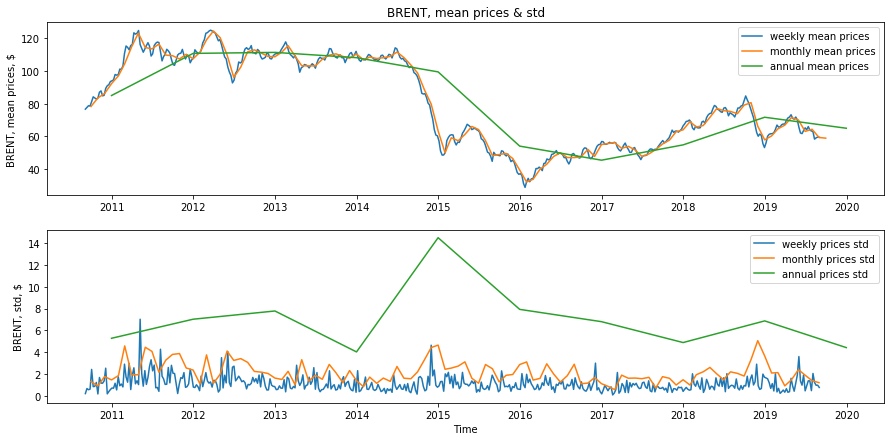

In [25]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.ylabel('BRENT, mean prices, $')
plt.plot(brent_weekly_mean.index, brent_weekly_mean, label='weekly mean prices' )
plt.plot(brent_monthly_mean.index, brent_monthly_mean, label='monthly mean prices')
plt.plot(brent_annual_mean.index, brent_annual_mean, label='annual mean prices')
plt.legend()

plt.title('BRENT, mean prices & std')

plt.subplot(2, 1, 2)
plt.ylabel('BRENT, std, $')
plt.plot(brent_weekly_std.index, brent_weekly_std, label='weekly prices std' )
plt.plot(brent_monthly_std.index, brent_monthly_std, label='monthly prices std')
plt.plot(brent_annual_std.index, brent_annual_std, label='annual prices std')
plt.legend()

plt.xlabel('Time')
plt.show()

5.

Изменение цен лучше всего ощущается в годовых разрезах 